# Summary figure

Making a thesis summary figure over 3 datasets, over all metrics, real and permuted data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import glob

In [62]:
%%time
#Reading in all the data for all datasets, both real and permuted 
real_paths = glob.glob('../../nf_pipeline/outputs/SRRS_20220526/gene_ont/*.csv')
perm_paths = glob.glob('../../nf_pipeline/outputs/SRRS_20220531_permuted/gene_ont/*.csv')

#(the vz_Liver were run later, so add them on)
real_paths += glob.glob('../../nf_pipeline/outputs/vz_Liver_20220601_direct/gene_ont/*.csv')
perm_paths += glob.glob('../../nf_pipeline/outputs/vz_Liver_perm/gene_ont/*.csv')

#(the central scores were run later, so add them on)
real_paths += glob.glob('../../nf_pipeline/outputs/BICCN_20220601_direct/gene_ont/*.csv')
perm_paths += glob.glob('../../nf_pipeline/outputs/BICCN_20221017_perm_5_filt/gene_ont/*.csv')

real_paths += glob.glob('../../nf_pipeline/outputs/vz_Brainmap_20220602_direct/gene_ont/*.csv')

#Read-in and aggregate
real_df = pd.concat(pd.read_csv(p) for p in real_paths)
perm_df = pd.concat(pd.read_csv(p) for p in perm_paths)

df = pd.concat((real_df.assign(kind='real'), perm_df.assign(kind='perm')))

df

CPU times: user 2.06 s, sys: 256 ms, total: 2.32 s
Wall time: 3.41 s


,experiment,sample,metric,gene,annotation,num_cells,med_gene_spots,med_spots,med_score,z,p,bh_p,kind
0,vz_Brainmap_slice3,s3r1,radial,Abcc9,8,119,5.0,1097.0,0.856000,5573.733592,0.000000,0.000000,real
1,vz_Brainmap_slice3,s3r1,radial,Ackr1,0,1117,6.0,1071.0,0.028000,461.377756,0.000000,0.000000,real
2,vz_Brainmap_slice3,s3r1,radial,Ackr1,1,1141,12.0,1119.0,0.046000,1097.570875,0.000000,0.000000,real
3,vz_Brainmap_slice3,s3r1,radial,Ackr1,2,1082,8.0,1084.0,0.010000,194.930311,0.000000,0.000000,real
4,vz_Brainmap_slice3,s3r1,radial,Ackr1,3,1025,7.0,1093.0,0.100000,1835.697700,0.000000,0.000000,real
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1806,BICCN_mouse2,m2s1,central,Zfp804b,L5_ET,30,5.5,1242.0,-0.080473,-0.065078,0.948112,0.995767,perm
1807,BICCN_mouse2,m2s1,central,Zfp804b,L6_CT,39,5.0,426.0,-0.009242,-0.505416,0.613266,0.995678,perm
1808,BICCN_mouse2,m2s1,central,Zfp804b,L6_IT,55,5.0,657.0,-0.030043,0.147425,0.882797,0.995767,perm
1809,BICCN_mouse2,m2s1,central,Zfp804b,Lamp5,60,6.5,733.5,0.089360,1.347796,0.177724,0.980583,perm


In [64]:
#Filter to just the 3 main datasets
experiment_stubs = [
    'vz_Brainmap',
    'vz_Liver',
    'BICCN',
]

for stub in experiment_stubs:
    df.loc[df['experiment'].str.contains(stub),'Experiment'] = stub
    
df = df.dropna(subset=['Experiment'])

df

,experiment,sample,metric,gene,annotation,num_cells,med_gene_spots,med_spots,med_score,z,p,bh_p,kind,Experiment
0,vz_Brainmap_slice3,s3r1,radial,Abcc9,8,119,5.0,1097.0,0.856000,5573.733592,0.000000,0.000000,real,vz_Brainmap
1,vz_Brainmap_slice3,s3r1,radial,Ackr1,0,1117,6.0,1071.0,0.028000,461.377756,0.000000,0.000000,real,vz_Brainmap
2,vz_Brainmap_slice3,s3r1,radial,Ackr1,1,1141,12.0,1119.0,0.046000,1097.570875,0.000000,0.000000,real,vz_Brainmap
3,vz_Brainmap_slice3,s3r1,radial,Ackr1,2,1082,8.0,1084.0,0.010000,194.930311,0.000000,0.000000,real,vz_Brainmap
4,vz_Brainmap_slice3,s3r1,radial,Ackr1,3,1025,7.0,1093.0,0.100000,1835.697700,0.000000,0.000000,real,vz_Brainmap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1806,BICCN_mouse2,m2s1,central,Zfp804b,L5_ET,30,5.5,1242.0,-0.080473,-0.065078,0.948112,0.995767,perm,BICCN
1807,BICCN_mouse2,m2s1,central,Zfp804b,L6_CT,39,5.0,426.0,-0.009242,-0.505416,0.613266,0.995678,perm,BICCN
1808,BICCN_mouse2,m2s1,central,Zfp804b,L6_IT,55,5.0,657.0,-0.030043,0.147425,0.882797,0.995767,perm,BICCN
1809,BICCN_mouse2,m2s1,central,Zfp804b,Lamp5,60,6.5,733.5,0.089360,1.347796,0.177724,0.980583,perm,BICCN


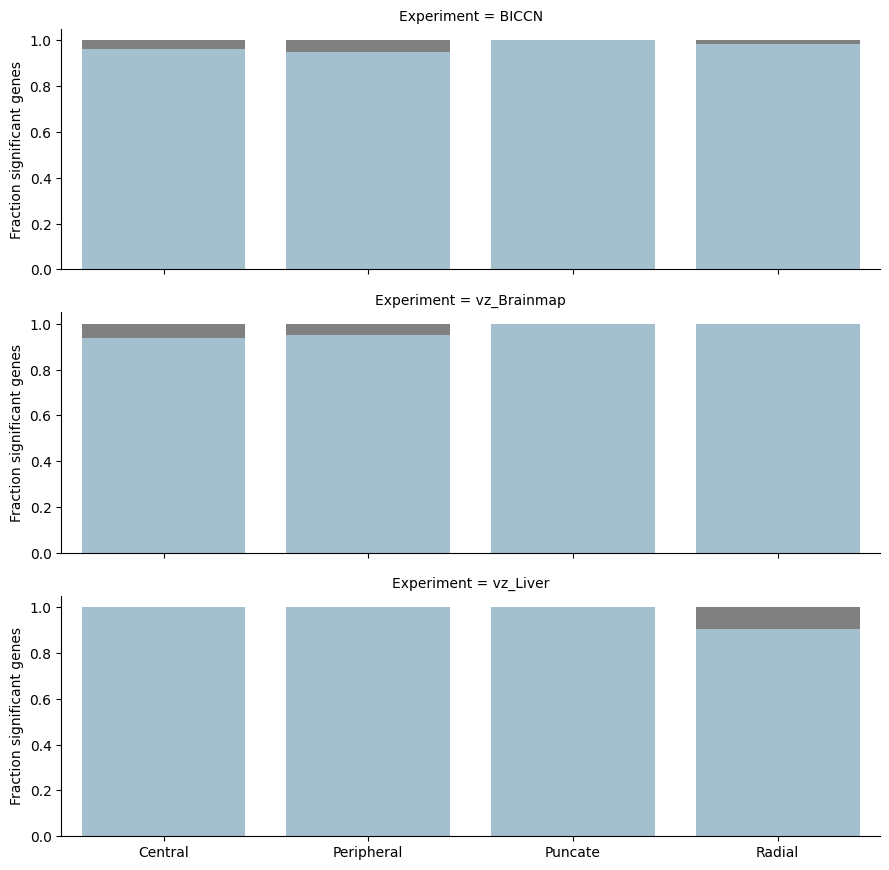

In [101]:
#Create barplots of the fraction of genes that are significant at least once in the dataset w/ any cell-type

tot_genes = df[
    df['num_cells'].ge(200)
    & df['med_gene_spots'].ge(5)
].groupby(['Experiment','metric','kind'])['gene'].nunique()

sig_genes = df[
    df['bh_p'].le(0.05)
    & df['num_cells'].ge(200)
    & df['med_gene_spots'].ge(5)
].groupby(['Experiment','metric','kind'])['gene'].nunique()

tot_genes.name = 'Total'
sig_genes.name = 'Significant'

ct_df = pd.concat((tot_genes,sig_genes),axis=1).fillna(0).reset_index()
ct_df['Fraction significant genes'] = ct_df['Significant'].div(ct_df['Total'])

ct_df['metric'].replace({
    'periph':'Peripheral',
    'central':'Central',
    'puncta':'Puncate',
    'radial':'Radial',
}, inplace=True)

ct_df['Max'] = 1

g = sns.catplot(
    kind = 'bar',
    x = 'metric',
    y = 'Max',
    row = 'Experiment',
    color = 'grey',
    data = ct_df[ct_df['kind'].eq('real')],
    aspect = 3,
    height = 3,
)

#add a background
g.map_dataframe(
    sns.barplot,
    x = 'metric',
    y = 'Fraction significant genes',
    color = '#9DC2D6',
)

plt.xlabel('')
plt.savefig('boxplot_fraction_significant_genes.svg')
plt.show()
plt.close()

Experiment   metric   kind
BICCN        central  perm    2705
                      real     464
             periph   perm    2705
                      real    2171
             puncta   perm    3026
                      real    2645
             radial   perm    3026
                      real    2645
vz_Brainmap  central  perm    2195
                      real    2195
             periph   perm    2195
                      real    2195
             puncta   perm    2546
                      real    2546
             radial   perm    2546
                      real    2546
vz_Liver     central  perm    1469
                      real    1509
             periph   perm    1469
                      real    1509
             puncta   perm    1727
                      real    1797
             radial   real    1727
dtype: int64

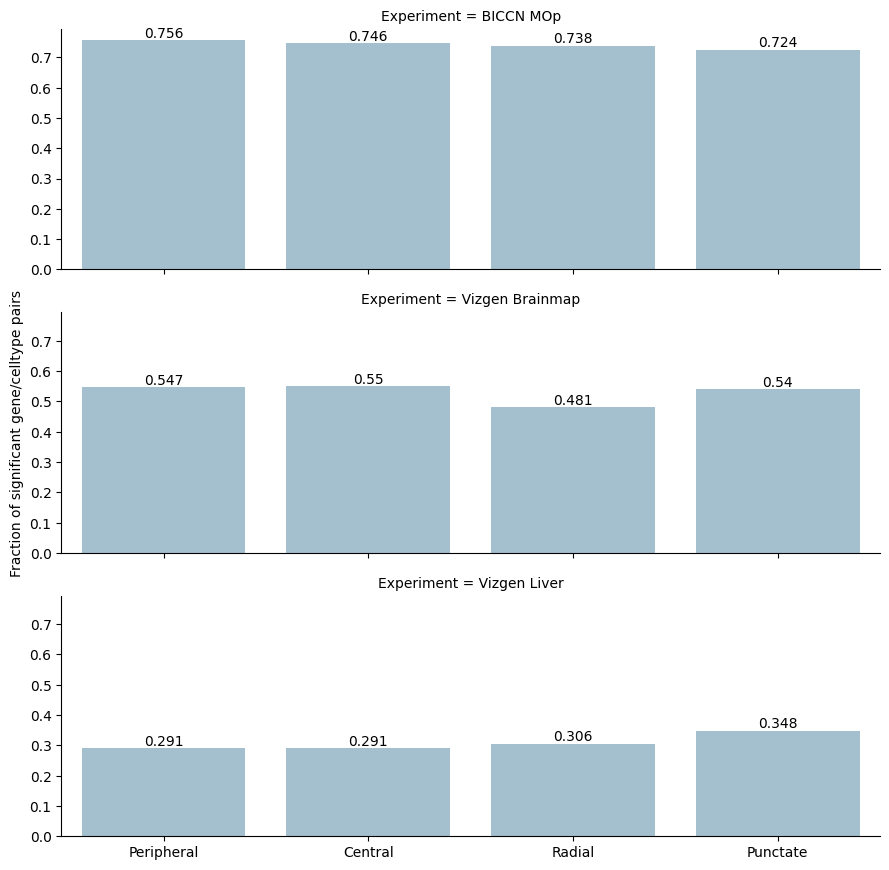

In [123]:
#Create barplots of the fraction of gene/celltype pairs that are significant

#(using numbers from the thesis instead of re-calculating)
data = {
    'Experiment':[
        'BICCN MOp','BICCN MOp','BICCN MOp','BICCN MOp',
        'Vizgen Brainmap','Vizgen Brainmap','Vizgen Brainmap','Vizgen Brainmap',
        'Vizgen Liver','Vizgen Liver','Vizgen Liver','Vizgen Liver',
    ],
    'Metric':[
        'Peripheral','Central','Radial','Punctate',
        'Peripheral','Central','Radial','Punctate',
        'Peripheral','Central','Radial','Punctate',
    ],
    'Fraction':[
        0.756, 0.746, 0.738, 0.724,
        0.547, 0.550, 0.481, 0.540,
        0.291, 0.291, 0.306, 0.348,
    ]
}
gct_df = pd.DataFrame(data)


gct_df['Max'] = 1

#add the actual data
g = sns.catplot(
    kind = 'bar',
    x = 'Metric',
    y = 'Fraction',
    row = 'Experiment',
    color = '#9DC2D6',
    data = gct_df,
    aspect = 3,
    height = 3,
)

#add labels
for ax in g.axes.flatten():
    for i in ax.containers:
        ax.bar_label(i,)

# #add a background
# g.map_dataframe(
#     sns.barplot,
#     x = 'Metric',
#     y = 'Max',
#     color = 'grey',
#     zorder = -1,
# )

#rename y-label
for i,ax in enumerate(g.axes.flatten()):
    if i != 1:
        ax.set_ylabel('')
    else:
        ax.set_ylabel('Fraction of significant gene/celltype pairs')


plt.xlabel('')
plt.savefig('boxplot_fraction_significant_gene_ct_pairs.svg')
plt.show()
plt.close()

/tmp/ipykernel_3270/322086926.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Kind'] = df['kind'].replace({'real':'Real','perm':'Permuted'})


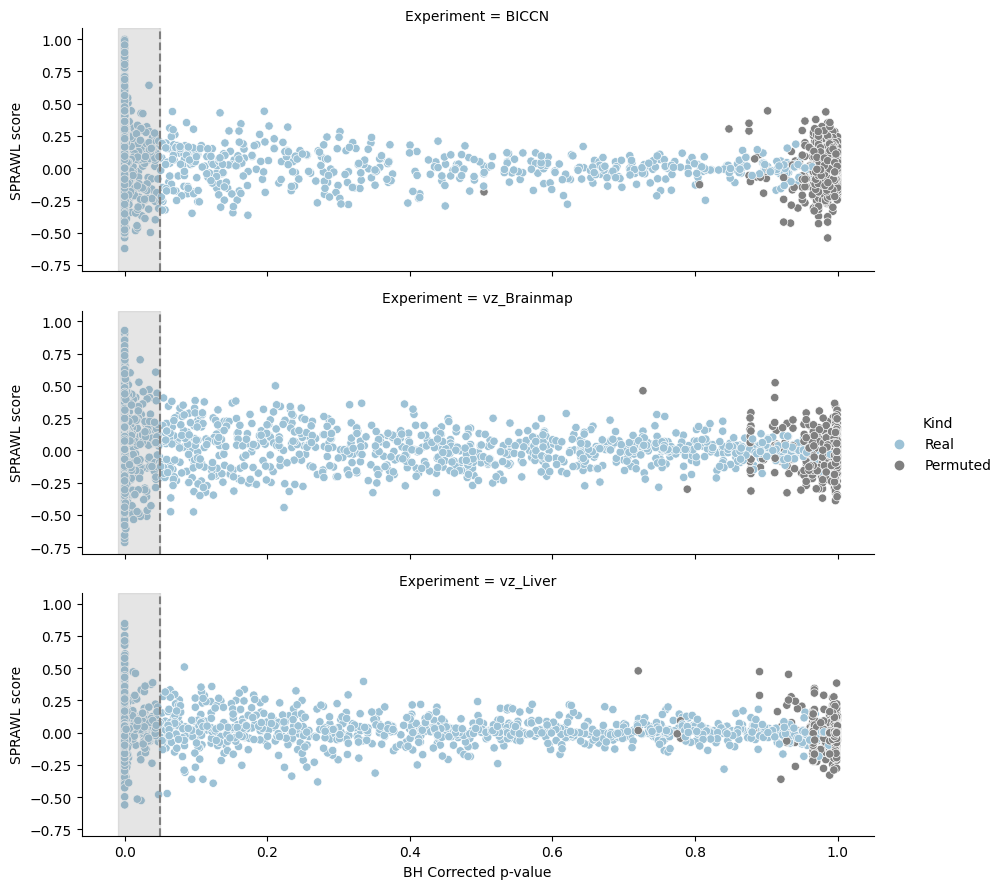

In [100]:
#Scatter plots of score by pval
df['Kind'] = df['kind'].replace({'real':'Real','perm':'Permuted'})

g = sns.relplot(
    kind = 'scatter',
    x = 'bh_p',
    y = 'med_score',
    hue = 'Kind',
    row = 'Experiment',
    palette = {'Real':'#9DC2D6','Permuted':'grey'},
    data = df.groupby('Experiment').sample(3000),
    aspect = 3,
    height = 3,
)

for ax in g.axes.flatten():
    ax.axvline(0.05, linestyle='dashed', color='grey')
    ax.axvspan(-0.01, 0.05, color='grey', alpha=0.2,)
    ax.set_ylabel('SPRAWL score')
    
plt.xlabel('BH Corrected p-value')
plt.savefig('score_vs_p_summary.svg')
plt.show()
plt.close()